# SQLとPandas

copyright 2017 DataMix Co., Ltd.

### 本資料の目的
* データをデータベースからSQLを使って抽出する
* データの前処理で活躍するライブラリ Pandasの使い方に親しむ

<H2>1. 必要なライブラリを読み込む</H2>
<p>ここではデータの読み込みに必要なpandasを使用します</p>

In [2]:
%matplotlib inline
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import psycopg2

from __future__ import print_function

<H2>2. データベースへのアクセスを確立する</H2>
<p> pandas.io.sql (psql) にはread_sqlという関数が用意されており、それを用いれば簡単にSQLでデータをPandas.DataFrameという形式でデータをダウンロードできる</p>

* dbnameはアクセスするデータベースの名前を指定
* userはユーザー名
* passwordはパスワード
* hostはデータベースがあるサーバーのアドレス
* portは通信する際のポート番号（今回はRedshiftなので5439。実務で使う場合はデータベースエンジニアなど管理者に確認）

In [3]:
db_params = {
    'dbname': 'kameliodemo',
    'user': 'dsbootcamp',
    'password': 'July2017',
    'host': "sql-training.crijpbsngns8.ap-northeast-1.redshift.amazonaws.com",
    'port': 5439
}

con = psycopg2.connect(**db_params)

SQLを文字列で記載して、psql.read_sql関数にデータベースとのコネクション(con）とSQLを投げると、データが取得できる。

In [4]:
sql = " SELECT * FROM user_data.user_master LIMIT 100"
data = psql.read_sql(con=con, sql=sql)

上記で抽出したデータはPandas.DataFrameというデータ形式になります。dataframe.head()とすると最初の5行を出力してくれます。

In [5]:
data.head()

,user_id,created_at,user_type
0,1,2013-12-26 08:28:32,1
1,3,2014-03-29 16:34:42,1
2,5,2013-12-26 08:41:44,1
3,7,2013-12-27 08:21:32,1
4,9,2013-12-27 09:07:23,1


<H2>試してみよう</H2>
<p>user_master.user_attributeを使って年齢別のユーザー数をカウントしてください。</p>

### データベースからデータを取得する

In [6]:
your_sql = """
SELECT 
    age, 
    count(*) as user_num  
    FROM user_data.user_attribute 
    WHERE age is not NULL 
    GROUP BY age
"""

In [7]:
user_count_by_age = psql.read_sql(con=con, sql=your_sql)

In [8]:
user_count_by_age.head()

,age,user_num
0,26,1654
1,31,1491
2,43,1037
3,32,1378
4,34,1453


### Pandasならデータの可視化も簡単

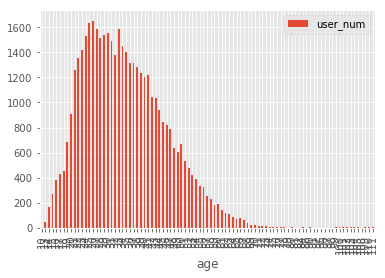

In [9]:
user_count_by_age.sort_values(by="age", inplace=True)
user_count_by_age.plot.bar(x="age")

Pandas.DataFrameの行数、列数を調べるときは、DataFrame.shape

In [10]:
print("Number of Rows: %i   Number of Columns: %i"%user_count_by_age.shape)

Number of Rows: 91   Number of Columns: 2


<h3>単一条件でのフィルタリング</h3>
<p>ageが100以上の行を抽出する</p>

In [11]:
user_count_by_age[user_count_by_age["age"]>100]

,age,user_num
64,101,4
35,102,6
41,103,2
39,104,3
33,105,3
14,108,1
27,109,4
32,110,4
40,111,2


<h3>複数条件でのフィルタリング OR</h3>
<p>ageが100以上の行を抽出する</p>

In [12]:
irregular_data = user_count_by_age[np.logical_or(user_count_by_age["age"]>100,   user_count_by_age["age"]<18)]
irregular_data.head()

,age,user_num
73,10,1
21,13,48
20,14,163
71,15,268
63,16,381


年齢が不自然なユーザーの人数を計算するために足し算をしましょう

In [13]:
sum(irregular_data.user_num)

1315

## 演習:  テーマランキング
2016年1月中にフォローされたテーマについて、2016年1月中のフォロー数を集計し、ヒストグラムを出してみましょう。

In [14]:
your_sql = """

"""

In [15]:
# ENTER your code here

### ヒストグラムを書いてみましょう 
Hint: DataFrame['対象の列名'].hist(bins=100)   
* binsはヒストグラムの分割数を指定

In [16]:
# ENTER your code here

 #### 質問1: フォロー人数5人以下のテーマ数はいくつありますか？

In [17]:
# ENTER your code here

#### 質問2: フォロー人数100人以上のテーマ数はいくつありますか？

In [18]:
# ENTER your code here

## 演習: ユーザー属性別のテーマフォロー数
* user_data.follow_topic（誰がどのテーマをフォローしているか）
* user_data.user_master

を使って、属性別のテーマフォロー数がわかるような表をPandasを使って作成してください。

In [19]:
# ENTER your code here

#### 質問1: 男性、女性の平均テーマ数を教えてください。

In [20]:
# ENTER your code here

#### 質問2: 女性30代と男性30代の平均テーマ数を数をそれぞれ調べてください。

In [21]:
# ENTER your code here

#### 質問3: 年齢とテーマフォロー数には関係がありそうですか？

In [22]:
# ENTER your code here

<H2>(参考1) Pandasの最も基本的な使い方</H2>

### CSVファイルを読み込む
<p>データはdataフォルダ直下にある"kc_house_data.csv"を使用します。</p>

In [23]:
dataset = pd.read_csv("data/kc_house_data.csv")

<h3> インデックスを用いた行の指定</h3>
<p>インデックス番号0~10の行を抽出する</p>

In [24]:
dataset.ix[0:10]

C:\Users\Hiroshi.Hiromax\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<h3> カラム名を用いた列の指定</h3>
<p> 最初の10行の"price"と"bedrooms"の列を抽出する</p>

In [25]:
dataset.ix[:9][["price", "bedrooms"]]

,price,bedrooms
0,221900.0,3
1,538000.0,3
2,180000.0,2
3,604000.0,4
4,510000.0,3
5,1225000.0,4
6,257500.0,3
7,291850.0,3
8,229500.0,3
9,323000.0,3


<h3>カラム間の演算</h3>
<p>ここでは例として"sqft_above"と"sqft_basement"を合計した"sqft_total"を新たな列として加える</p>

In [26]:
dataset["sqft_total"] = dataset["sqft_above"] + dataset["sqft_basement"]
dataset.ix[0:9][["id", "sqft_above", "sqft_basement", "sqft_total"]]

,id,sqft_above,sqft_basement,sqft_total
0,7129300520,1180,0,1180
1,6414100192,2170,400,2570
2,5631500400,770,0,770
3,2487200875,1050,910,1960
4,1954400510,1680,0,1680
5,7237550310,3890,1530,5420
6,1321400060,1715,0,1715
7,2008000270,1060,0,1060
8,2414600126,1050,730,1780
9,3793500160,1890,0,1890


<h3>カラムに関数を適用する</h3>
<p>"date"は文字列になっているが、これを年と月で分解して新しいカラムとして追加する</p>

In [27]:
def date_str2year(x):
    #最初の４文字を取り出せば、年になる
    return int(x[:4])

def date_str2month(x):
    #5文字から6文字目を取り出せば、月になる
    return int(x[4:6])

In [28]:
dataset["date_year"] = dataset["date"].apply(date_str2year)
dataset["date_month"] = dataset["date"].apply(date_str2month)
dataset.ix[0:9][["id","date", "date_year", "date_month"]]

,id,date,date_year,date_month
0,7129300520,20141013T000000,2014,10
1,6414100192,20141209T000000,2014,12
2,5631500400,20150225T000000,2015,2
3,2487200875,20141209T000000,2014,12
4,1954400510,20150218T000000,2015,2
5,7237550310,20140512T000000,2014,5
6,1321400060,20140627T000000,2014,6
7,2008000270,20150115T000000,2015,1
8,2414600126,20150415T000000,2015,4
9,3793500160,20150312T000000,2015,3


<p>(参考)pandasのデータフレームへのカラムへのアクセスですが、これまでdataset["カラム名"]という書き方をしていましたが、別の方法としてdataset.カラム名というアクセスの仕方があります。</p>

<h3>複数条件でのデータ抽出</h3>
<p>ここではbedroomsもbathroomsも1以下の物件を抽出</p>

<p>numpyの関数logical_andを使って指定するやり方</p>

In [29]:
dataset[np.logical_and( (dataset["bedrooms"] <1) , (dataset["bathrooms"] <1))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total,date_year,date_month
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,1990,0,98102,47.6362,-122.322,2360,4000,3064,2014,6
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,2006,0,98133,47.7145,-122.356,1470,1399,1470,2015,2
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,1990,0,98053,47.6642,-122.069,4740,35061,4810,2014,6
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,1990,0,98031,47.4095,-122.168,2520,8050,2460,2015,4
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,1996,0,98065,47.5265,-121.828,1060,7200,1470,2014,12
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,0,...,1913,0,98001,47.2781,-122.250,1380,9600,844,2015,4
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,2003,0,98070,47.4177,-122.491,1920,224341,384,2014,10
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1963,0,98024,47.5308,-121.888,1620,22850,290,2014,9


<p>numpyのallを使って指定するやり方</p>

In [30]:
a = np.array(dataset["bedrooms"]<1)
b = np.array(dataset["bathrooms"]<1)

In [31]:
dataset[np.all([a, b], axis=0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total,date_year,date_month
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,1990,0,98102,47.6362,-122.322,2360,4000,3064,2014,6
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,2006,0,98133,47.7145,-122.356,1470,1399,1470,2015,2
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,1990,0,98053,47.6642,-122.069,4740,35061,4810,2014,6
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,1990,0,98031,47.4095,-122.168,2520,8050,2460,2015,4
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,1996,0,98065,47.5265,-121.828,1060,7200,1470,2014,12
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,0,...,1913,0,98001,47.2781,-122.250,1380,9600,844,2015,4
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,2003,0,98070,47.4177,-122.491,1920,224341,384,2014,10
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1963,0,98024,47.5308,-121.888,1620,22850,290,2014,9


<p>ビット演算子の"&"を使って指定するやり方。ただし、ビット演算子なので、"(dataset["bedrooms"] <1)" は必ずTrue/Falseになるので問題ないが、それ以外の値が来た場合、予期せぬ動きをする可能性があるので注意が必要</p>

In [32]:
dataset[(dataset["bedrooms"] <1) & (dataset["bathrooms"] <1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total,date_year,date_month
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,1990,0,98102,47.6362,-122.322,2360,4000,3064,2014,6
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,2006,0,98133,47.7145,-122.356,1470,1399,1470,2015,2
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,1990,0,98053,47.6642,-122.069,4740,35061,4810,2014,6
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,1990,0,98031,47.4095,-122.168,2520,8050,2460,2015,4
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,1996,0,98065,47.5265,-121.828,1060,7200,1470,2014,12
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,0,...,1913,0,98001,47.2781,-122.250,1380,9600,844,2015,4
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,2003,0,98070,47.4177,-122.491,1920,224341,384,2014,10
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1963,0,98024,47.5308,-121.888,1620,22850,290,2014,9


<h2>(参考2) データ可視化入門 (Pandasを使った場合)</h2>

<h3>ヒストグラム</h3>
<p>ひとつの数値データのバラツキを可視化する際にはヒストグラムが有効</p>

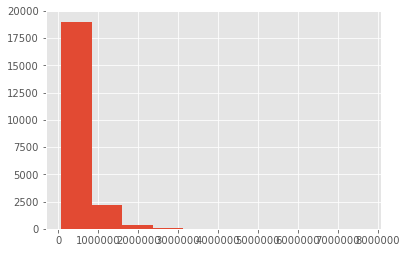

In [33]:
#dataset.price.hist()
#以下でも同じ
dataset["price"].hist()

<p>logスケールにしたい場合は、Numpyのlog関数を使って行う</p>

(array([  6.30000000e+01,   5.33000000e+02,   3.97700000e+03,
          7.18300000e+03,   6.34500000e+03,   2.54100000e+03,
          7.33000000e+02,   1.93000000e+02,   3.80000000e+01,
          7.00000000e+00]),
 array([ 11.22524339,  11.68839214,  12.15154089,  12.61468964,
         13.07783839,  13.54098714,  14.00413589,  14.46728464,
         14.93043339,  15.39358214,  15.85673089]),
 <a list of 10 Patch objects>)

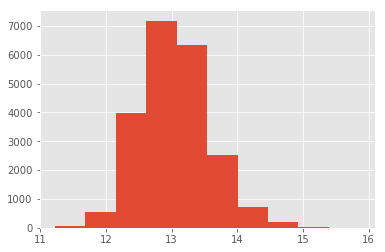

In [34]:
plt.hist(np.log(dataset["price"]))

<h3>散布図</h3>
<p>2つの変数のバラツキや相関関係を確認するには散布図を使う</p>

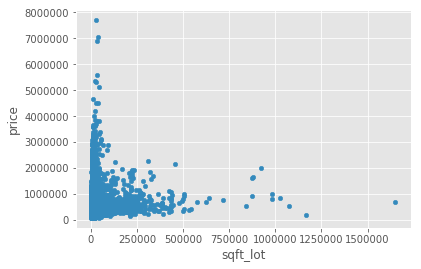

In [35]:
dataset.plot(kind='scatter', x='sqft_lot', y='price')

<h3>Group Byで集計して棒グラフ</h3>
<p> "condition"はカテゴリ変数なので、この変数をキーにして"price"の平均を集計し、それを棒グラフにします</p>

In [36]:
dataset.groupby("condition").aggregate({"price":np.mean}).reset_index()

,condition,price
0,1,334431.666667
1,2,327287.145349
2,3,542012.578148
3,4,521200.390033
4,5,612418.089359


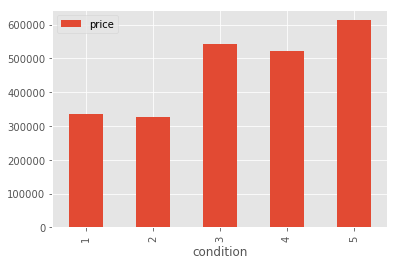

In [37]:
price_by_condition = dataset.groupby("condition").aggregate({"price":np.mean}).reset_index()
price_by_condition.plot.bar(x="condition")

<h3>Group Byで集計して折れ線グラフ</h3>
<p> "date_month"をキーにして"price"の平均を集計し、それを折れ線グラフにします</p>

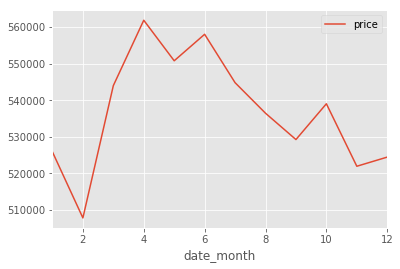

In [38]:
dataset.groupby(["date_month"]).aggregate({"price":np.mean}).plot()

<h3>箱ヒゲ図(Boxplot) </h3>
<p>棒グラフにすると平均の比較はできますが、分布全体の比較はできません。そこで箱ヒゲ図の出番です。</p>
<p>各要因ごとに分布を比較したいときに箱ヒゲ図はとても便利です</p>

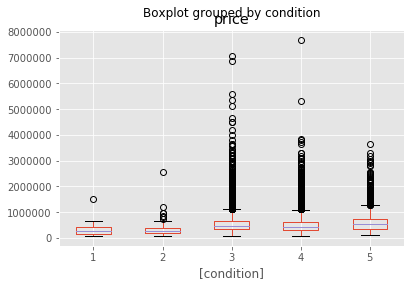

In [39]:
dataset[["condition", "price"]].boxplot(by="condition")

<h2>6. matplotlibを使ったデータ可視化</h2>

上記のようにpandasの機能を使っても可視化は可能ですが、直接matplotlibを使っても可視化が可能です。

### 散布図

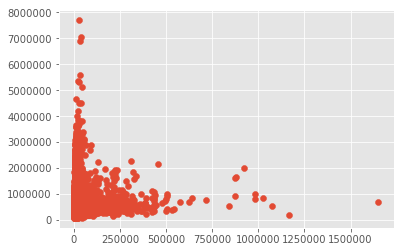

In [40]:
sqft_lot_ar = np.array(dataset["sqft_lot"])
price_ar = np.array(dataset["price"])
#plt.plot(sqft_lot_ar, price_ar, "o")
plt.scatter(sqft_lot_ar, price_ar)

### 散布図で色分け

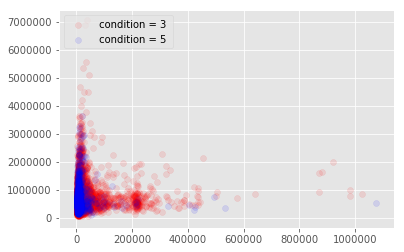

In [41]:
#condition = 3の物件のみを抽出
df_condition3 = dataset[dataset["condition"] == 3]
sqft_lot_3_ar = np.array(df_condition3["sqft_lot"])
price_3_ar = np.array(df_condition3["price"])

#condition = 5の物件のみを抽出
df_condition5 = dataset[dataset["condition"] == 5]
sqft_lot_5_ar = np.array(df_condition5.sqft_lot)
price_5_ar = np.array(df_condition5.price)

plt.scatter(sqft_lot_3_ar, price_3_ar, c = "red" , label=" condition = 3 " , alpha=0.1)
plt.scatter(sqft_lot_5_ar, price_5_ar, c = "blue", label=" condition = 5", alpha = 0.1 )

#plt.scatter(sqft_lot_3_ar, price_3_ar, c = "red" , label=" condition = 3 " )
#plt.scatter(sqft_lot_5_ar, price_5_ar, c = "blue", label=" condition = 5")

plt.legend(loc='upper left')

### ヒストグラム

### 平均1, 標準偏差0.2の正規分布から1000個サンプルし、ヒストグラムを描く

(array([   1.,    8.,   39.,   88.,  190.,  265.,  223.,  117.,   59.,   10.]),
 array([ 0.28729667,  0.41384388,  0.5403911 ,  0.66693831,  0.79348553,
         0.92003274,  1.04657996,  1.17312717,  1.29967439,  1.4262216 ,
         1.55276882]),
 <a list of 10 Patch objects>)

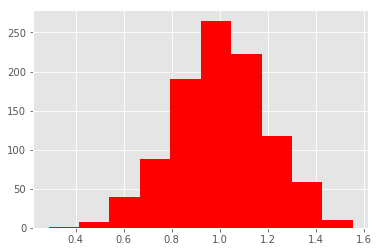

In [42]:
mean = 1.0
std = 0.2
sample_size = 1000
np.random.seed(1234)
normal_sample = np.random.normal(mean, std, sample_size)
plt.hist(normal_sample, bins=10, color='red')

### 2つのヒストグラムを重ね合わせる

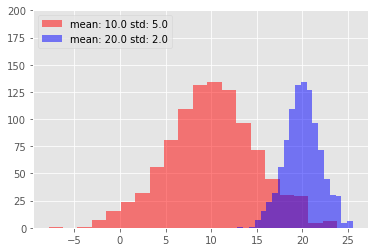

In [43]:
mean1 = 10.0
std1 = 5
sample_size1 = 1000
np.random.seed(1234)
normal_sample1 = np.random.normal(mean1, std1, sample_size1)


mean2 = 20.0
std2 = 2
sample_size2 = 1000
np.random.seed(1234)
normal_sample2 = np.random.normal(mean2, std2, sample_size2)


plt.hist(normal_sample1, bins=20, color='red', alpha=0.5, label = "mean: %.1f std: %.1f"%(mean1, std1))
plt.hist(normal_sample2, bins=20, color='blue', alpha=0.5, label = "mean: %.1f std: %.1f"%(mean2, std2))
plt.ylim(0, 200)
plt.legend(loc='upper left')